In [26]:
#pip install tensorflow

In [75]:
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
data = pd.read_csv('Sentiment Analysis Dataset.csv'  , encoding='latin1')

In [4]:
data.shape

(1048575, 3)

In [5]:
df = data.head(50000)

In [6]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


## Pre-processing

In [7]:
print(df.isnull().sum())

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64


In [8]:
print(df['Sentiment'].value_counts())

1    26920
0    23080
Name: Sentiment, dtype: int64


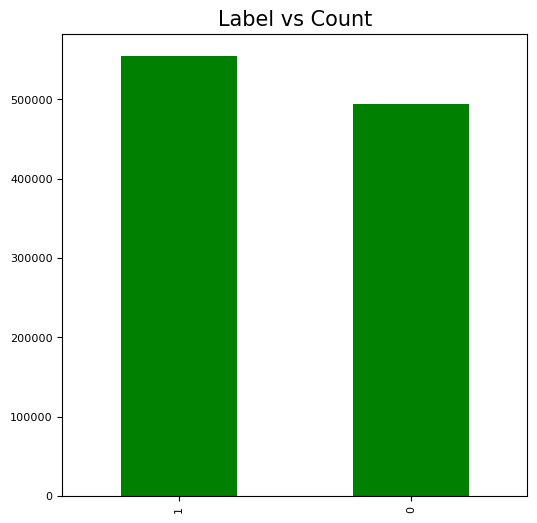

In [79]:
fig, ax = plt.subplots(figsize=(6,6))
vc = data.Sentiment.value_counts()
vc.plot.bar(color="green",fontsize=8,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [40]:
stop_words = set(stopwords.words('english'))
def preprocess(tweet):
    tokens = word_tokenize(tweet)
    tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(tokens)

In [19]:
df['clean_SentimentText'] = df['SentimentText'].apply(preprocess)

C:\Users\User\AppData\Local\Temp\ipykernel_19032\2392729674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_SentimentText'] = df['SentimentText'].apply(preprocess)


In [20]:
df.head()

,ItemID,Sentiment,SentimentText,clean_SentimentText
0,1,0,is so sad for my APL frie...,sad APL friend
1,2,0,I missed the New Moon trail...,missed New Moon trailer
2,3,1,omg its already 7:30 :O,omg already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy dentist since 11 s...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


In [100]:
texts = df['clean_SentimentText'].astype(str).values
labels = df['Sentiment'].values

In [101]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [102]:
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)

In [103]:
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
y = tf.keras.utils.to_categorical(y, num_classes=2)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## CNN-LSTM

In [105]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [107]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6403 - loss: 0.6118 - val_accuracy: 0.7360 - val_loss: 0.5173
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7964 - loss: 0.4410 - val_accuracy: 0.7335 - val_loss: 0.5367
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.8458 - loss: 0.3409 - val_accuracy: 0.7184 - val_loss: 0.6296
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9079 - loss: 0.2210 - val_accuracy: 0.7074 - val_loss: 0.7700
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9360 - loss: 0.1497 - val_accuracy: 0.7005 - val_loss: 1.0587
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9512 - loss: 0.1112 - val_accuracy: 0.7000 - val_loss: 1.3561
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9614 - loss: 0.0884 - val_accuracy: 0.6992 - val_loss: 1.4673
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9664 - loss: 0.0732 - 

In [30]:
cnn_lstm_loss, cnn_lstm_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6948 - loss: 1.9496


In [31]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [32]:
cnn_lstm_precision = precision_score(y_true, y_pred, average='weighted')
cnn_lstm_recall = recall_score(y_true, y_pred, average='weighted')
cnn_lstm_f1 = f1_score(y_true, y_pred, average='weighted')

In [36]:
print(f'Accuracy: {cnn_lstm_accuracy:.2f}')
print(f'Precision: {cnn_lstm_precision:.2f}')
print(f'Recall: {cnn_lstm_recall:.2f}')
print(f'F1-score: {cnn_lstm_f1:.2f}')

Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.70


## LSTM

In [37]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [98]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (64, 100, 128)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (64, 128)                   │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (64, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 2)                     │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,315,528 (8.83 MB)

 Trainable params: 771,842 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,543,686 (5.89 MB)

In [39]:
history_lstm = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.6565 - loss: 0.6049 - val_accuracy: 0.7325 - val_loss: 0.5212
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.7783 - loss: 0.4621 - val_accuracy: 0.7330 - val_loss: 0.5249
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8014 - loss: 0.4210 - val_accuracy: 0.7364 - val_loss: 0.5510
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8219 - loss: 0.3766 - val_accuracy: 0.7304 - val_loss: 0.6082
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.8484 - loss: 0.3262 - val_accuracy: 0.7268 - val_loss: 0.6583
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.8651 - loss: 0.2904 - val_accuracy: 0.7207 - val_loss: 0.8133
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.8828 - loss: 0.2524 - val_accuracy: 0.7103 - val_loss: 0.9107
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.8961 - loss: 0.2226 - 

In [41]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7119 - loss: 1.2408


In [42]:
y_pred_probs = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [43]:
lstm_precision = precision_score(y_true, y_pred, average='weighted')
lstm_recall = recall_score(y_true, y_pred, average='weighted')
lstm_f1 = f1_score(y_true, y_pred, average='weighted')

In [48]:
print(f'Accuracy: {lstm_accuracy:.2f}')
print(f'Precision: {lstm_precision:.2f}')
print(f'Recall: {lstm_recall:.2f}')
print(f'F1-score: {lstm_f1:.2f}')

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-score: 0.71


## Logistic Regression

In [49]:
vectorizer = TfidfVectorizer(max_features=5000)
X_new = vectorizer.fit_transform(texts)

In [50]:
encoder = LabelEncoder()
y_new = encoder.fit_transform(labels)

In [51]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [52]:
lr_model = LogisticRegression()
lr_model.fit(X_new_train, y_new_train)

LogisticRegression()

In [53]:
y_pred_lr = lr_model.predict(X_new_test)

In [54]:
lr_accuracy = accuracy_score(y_new_test, y_pred_lr)

In [55]:
lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_new_test, y_pred_lr, average='binary')

In [56]:
print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Precision: {lr_precision:.2f}')
print(f'Recall: {lr_recall:.2f}')
print(f'F1 Score: {lr_f1:.2f}')

Accuracy: 0.74
Precision: 0.74
Recall: 0.80
F1 Score: 0.77


## SVM

In [80]:
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_new_train, y_new_train)

SVC(C=1, kernel='linear', probability=True)

In [81]:
y_pred_svm = svm_model.predict(X_new_test)

In [83]:
svm_accuracy = accuracy_score(y_new_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

SVM Accuracy: 74.20%


In [84]:
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_new_test, y_pred_svm, average='binary')

In [85]:
print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Precision: {svm_precision:.2f}')
print(f'Recall: {svm_recall:.2f}')
print(f'F1 Score: {svm_f1:.2f}')

Accuracy: 0.74
Precision: 0.74
Recall: 0.80
F1 Score: 0.77


## Comparision Table

In [91]:
compare_data = {
    'Model': ['CNN-LSTM', 'LSTM', 'Logisitic Regression', 'SVM'],
    'Accuracy': [cnn_lstm_accuracy, lstm_accuracy, lr_accuracy, svm_accuracy],
    'Precision': [cnn_lstm_precision, lstm_precision, lr_precision, svm_precision],
    'Recall': [cnn_lstm_recall, lstm_recall, lr_recall, svm_recall],
    'F1-score': [cnn_lstm_f1, lstm_f1, lr_f1, svm_f1],
}

In [92]:
compared_df = pd.DataFrame(compare_data)

In [93]:
compared_df

,Model,Accuracy,Precision,Recall,F1-score
0,CNN-LSTM,0.6963,0.697930,0.696300,0.696662
1,LSTM,0.7060,0.706254,0.706000,0.706107
2,Logisitic Regression,0.7438,0.742506,0.799291,0.769853
3,SVM,0.7420,0.740280,0.799105,0.768568


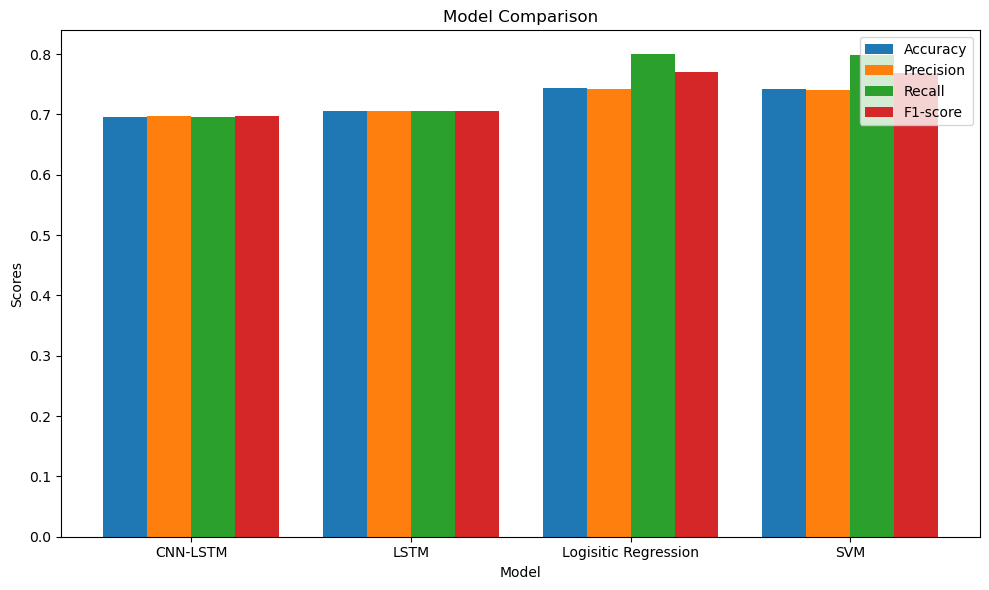

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(compare_data['Model']))

rects1 = ax.bar(index, compare_data['Accuracy'], bar_width, label='Accuracy')
rects2 = ax.bar([i + bar_width for i in index], compare_data['Precision'], bar_width, label='Precision')
rects3 = ax.bar([i + 2 * bar_width for i in index], compare_data['Recall'], bar_width, label='Recall')
rects4 = ax.bar([i + 3 * bar_width for i in index], compare_data['F1-score'], bar_width, label='F1-score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(compare_data['Model'])
ax.legend()

plt.tight_layout()
plt.show()